## Gamma-Poisson Markov Chain Monte Carlo Implementation

This notebook implements the MCMC example found in Chapter 13 of Bayesian Statistics for Beginners: A Step-by-Step Approach (Donovan & Mickey).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from tqdm.notebook import tqdm


class MCMC():
    def __init__(self, prior_fn, a_0, b_0, sigma=1):
        self.prior_fn = prior_fn
        self.a_0 = a_0
        self.b_0 = b_0
        self.sigma = sigma
        self.accepted = 0
    
    def run_simul(self, n_steps, data):
        self.points = []
        # randomly initialize l_c
        l_c = self.prior_fn.rvs(self.a_0, scale=1/self.b_0)
        for i in tqdm(range(n_steps)):
            self.points.append(l_c)
            l_c = self.mcmc_step(self.prior_fn, l_c, data)
            
        self.accepted = self.accepted / n_steps
            
    def mcmc_step(self, prior_fn, l_c, data):
        likelihood_c = stats.poisson.pmf(data, l_c)
        prior_c = self.prior_fn.pdf(l_c, self.a_0, scale=1/self.b_0)
        density_c = likelihood_c * prior_c
        
        # Sample l_p from normal distribution
        l_p = np.random.normal(l_c, self.sigma)
        
        likelihood_p = stats.poisson.pmf(data, l_p)
        prior_p = self.prior_fn.pdf(l_p, self.a_0, scale=1/self.b_0)
        density_p = likelihood_p * prior_p
        
        if self.metropolis_alg(density_c, density_p):
            l_c = l_p
            self.accepted += 1
            
        return l_c
    
    def metropolis_alg(self, density_c, density_p):
        '''
        Returns True if l_p should be accepted.
        '''
        if density_p >= density_c:
            result = True
        else:
            ratio = density_p / density_c
            result = True if np.random.rand() < ratio else False
        
        return result

In [2]:
prior_fn = stats.gamma
a_0 = 2.1
b_0 = 1

mcmc = MCMC(prior_fn, a_0, b_0, sigma=3)

In [3]:
mcmc.run_simul(10000, data=5)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
# Proportion of accepted proposals
mcmc.accepted

0.4567

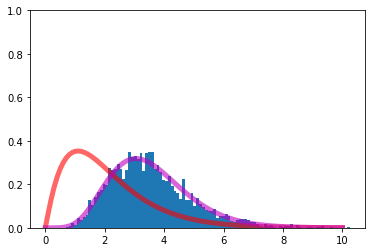

In [5]:
fig, ax = plt.subplots(1, 1)

# prior distribution hparams
a_0 = 2.1
rate_0 = 1

# posterior distribution hparams
a = 7.1
rate = 2

x = np.linspace(0, 10, 100)
ax.plot(x, stats.gamma.pdf(x, a_0, scale=1/rate_0),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.plot(x, stats.gamma.pdf(x, a, scale=1/rate),
       'm-', lw=5, alpha=0.6, label='gamma pdf')
ax.hist(mcmc.points, bins=100, density=True)
plt.ylim(0, 1)
plt.show()